# Simulation of AR(2) process

$$x_t = \phi_1 x_{t-1}+\phi_2 x_{t-2}+z_t$$

$z_t$ ~ $N(0, \sigma^2)$

## set seed a common number, so we can reproduce the same datasets

In [1]:
set.seed(2017)

## model parameters (we will estimate them)


In [2]:
sigma=4
phi=NULL
phi[1:2]=c(1/3,1/2)
phi

[1] 0.3333333 0.5000000

## number of data points


In [3]:
n=10000

## simulate ar process

In [4]:
ar.process=arima.sim(n,model=list(ar=c(1/3,1/2)), sd=4)
ar.process[1:5]

[1] 4.087685 5.598492 3.019295 2.442354 5.398302

## find and name 2nd and 3rd sample autocorrelation

In [5]:
r=NULL
r[1:2]=acf(ar.process, plot=F)$acf[2:3]
r

[1] 0.6814103 0.7255825

## matrix R

In [6]:
R=matrix(1,2,2) # matrix of dimension 2 by 2, with entries all 1's.
R

1,1
1,1


## edit R

In [7]:
R[1,2]=r[1] # only diagonal entries are edited
R[2,1]=r[1] # only diagonal entries are edited
R

1.0000000,0.6814103
0.6814103,1.0000000


## b-column vector on the right

In [8]:
b=matrix(r,nrow=2,ncol=1)# b- column vector with no entries
b

0.6814103
0.7255825


## solve(R,b) solves Rx=b, and gives x=R^(-1)b vector

In [9]:
phi.hat=matrix(c(solve(R,b)[1,1], solve(R,b)[2,1]),2,1)
phi.hat

0.3490720
0.4877212


## variance estimation

In [10]:
c0=acf(ar.process, type='covariance', plot=F)$acf[1]
var.hat=c0*(1-sum(phi.hat*r))
var.hat

[1] 16.37169

## plot time series, along with acf, pacf

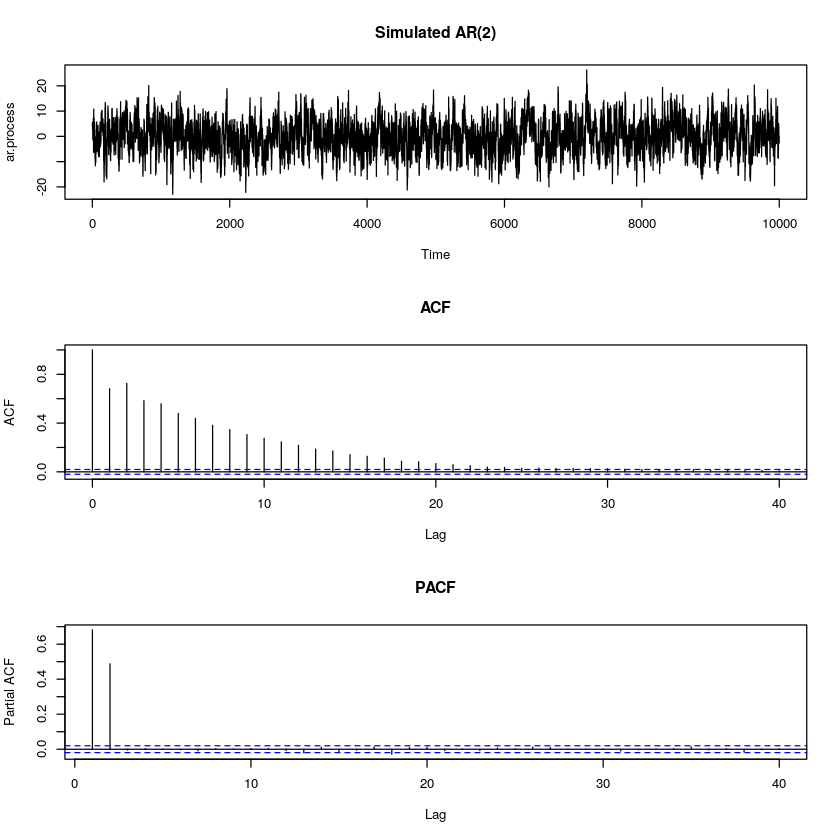

In [11]:
par(mfrow=c(3,1))
plot(ar.process, main='Simulated AR(2)')
acf(ar.process, main='ACF')
pacf(ar.process, main='PACF')